10 mil números aleatorios e histogramas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Semilla FIJA: para reproducibilidad
np.random.seed(0)

# Generar 10,000 números aleatorios entre 1 y 1000
numeros_aleatorios = np.random.randint(1, 1001, size=10000)

#for numero_aleatorio in numeros_aleatorios:
#  print(numero_aleatorio)

# Guardar en .txt
np.savetxt('numeros_aleatorios.txt', numeros_aleatorios, fmt='%d')

# Calcular medidas necesarias
n = len(numeros_aleatorios)
rango_datos = np.max(numeros_aleatorios) - np.min(numeros_aleatorios)
sigma = np.std(numeros_aleatorios)
iqr = np.percentile(numeros_aleatorios, 75) - np.percentile(numeros_aleatorios, 25)

# Regla de Sturges
bins_sturges = np.ceil(np.log2(n) + 1)

# Regla de Scott
ancho_bin_scott = 3.49 * sigma / np.cbrt(n)
bins_scott = int(np.floor(rango_datos / ancho_bin_scott))

# Regla de Freedman-Diaconis
ancho_bin_fd = 2 * iqr / np.cbrt(n)
bins_fd = int(np.floor(rango_datos / ancho_bin_fd))

# Regla de la raíz cuadrada
bins_sqrt = int(np.ceil(np.sqrt(n)))

# Crear los histogramas
fig, axs = plt.subplots(4, 1, figsize=(10, 24))  # Ajustar para acomodar un gráfico adicional

# Histograma con regla de Sturges
axs[0].hist(numeros_aleatorios, bins=int(bins_sturges), edgecolor='orange', color='skyblue')
axs[0].set_title('Histograma con Sturges')
axs[0].set_xlabel('Número')
axs[0].set_ylabel('Frecuencia')

# Histograma con regla de Scott
axs[1].hist(numeros_aleatorios, bins=bins_scott, edgecolor='orange', color='lightgreen')
axs[1].set_title('Histograma con Scott')
axs[1].set_xlabel('Número')
axs[1].set_ylabel('Frecuencia')

# Histograma con regla de Freedman-Diaconis
axs[2].hist(numeros_aleatorios, bins=bins_fd, edgecolor='orange', color='lightcoral')
axs[2].set_title('Histograma Freedman-Diaconis')
axs[2].set_xlabel('Número')
axs[2].set_ylabel('Frecuencia')

# Histograma con regla de la raíz cuadrada
axs[3].hist(numeros_aleatorios, bins=bins_sqrt, edgecolor='orange', color='lavender')
axs[3].set_title('Histograma raíz cuadrada')
axs[3].set_xlabel('Número')
axs[3].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Método de Box-Muller (uniforme a Gaussiana) y aceptación-rechazo (uniforme a gamma)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Función para calcular métricas estadísticas
def calcular_metricas(muestras):
    media = np.mean(muestras)
    mediana = np.median(muestras)
    varianza = np.var(muestras)
    desviacion_std = np.std(muestras)
    coef_variacion = desviacion_std / media
    rango = np.ptp(muestras)
    minimo = np.min(muestras)
    maximo = np.max(muestras)
    sesgo = skew(muestras)
    curtosis = kurtosis(muestras)

    metricas = {
        "Media": media,
        "Mediana": mediana,
        "Varianza": varianza,
        "Desviación Estándar": desviacion_std,
        "Coeficiente de Variación": coef_variacion,
        "Rango": rango,
        "Mínimo": minimo,
        "Máximo": maximo,
        "Sesgo": sesgo,
        "Curtosis": curtosis
    }

    return metricas

# Semilla FIJA: para reproducibilidad (Programa A)
np.random.seed(1)

# Programa A: Generación de datos con la distribución gaussiana
numeros_aleatorios_A = np.loadtxt('/content/numeros_aleatorios.txt')
n_A = 10_000
U1_A = (numeros_aleatorios_A - 1) / 999
U1_A = np.clip(U1_A, 1e-10, 1)
U2_A = np.random.uniform(0, 1, n_A)
Z0_A = np.sqrt(-2 * np.log(U1_A)) * np.cos(2 * np.pi * U2_A)

# Calcula el ancho del bin utilizando la regla de Freedman-Diaconis para Programa A
Rango_Intercuartilico_A = np.subtract(*np.percentile(Z0_A, [75, 25]))
ancho_bin_fd_A = 2 * Rango_Intercuartilico_A * n_A**(-1/3)
bins_fd_A = int((Z0_A.max() - Z0_A.min()) / ancho_bin_fd_A)

# Regla de Sturges para Programa A
bins_sturges_A = int(np.log2(n_A) + 1)

# Regla de Scott para Programa A
desviacion_std_A = np.std(Z0_A)
ancho_bin_scott_A = 3.49 * desviacion_std_A * n_A**(-1/3)
bins_scott_A = int((Z0_A.max() - Z0_A.min()) / ancho_bin_scott_A)

# Regla de la raíz cuadrada para Programa A
bins_raiz_A = int(np.sqrt(n_A))

# Configurando figuras para 4 histogramas con frecuencia en el eje Y para el Programa A
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
colores_A = ['blue', 'orange', 'green', 'red']
reglas_A = [
    ("Freedman-Diaconis", bins_fd_A, colores_A[0]),
    ("Sturges", bins_sturges_A, colores_A[1]),
    ("Scott", bins_scott_A, colores_A[2]),
    ("Raíz Cuadrada", bins_raiz_A, colores_A[3])
]

# Genera cada histograma para la distribución gaussiana
for ax, (titulo, bins, color) in zip(axs.flat, reglas_A):
    ax.hist(Z0_A, bins=bins, alpha=0.6, color=color, edgecolor='black', linewidth=1.2)
    ax.set_title(f"Histograma gaussiano con regla de {titulo}")
    ax.set_xlabel("Valor")
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()  # Mostrar los histogramas del Programa A

# Calcula métricas para la distribución gaussiana
metricas_normal_A = calcular_metricas(Z0_A)
print("Métricas para la distribución normal (Programa A):", metricas_normal_A, sep='\n')

# Semilla FIJA: para reproducibilidad (Programa B)
np.random.seed(3)

# Programa B: Generación de datos con la distribución Gamma
datos_archivo_B = np.loadtxt('/content/numeros_aleatorios.txt')  # Asegúrate de ajustar la ruta del archivo
U_B = (datos_archivo_B - 1) / 999
U_B = np.clip(U_B, 1e-10, 1)
n_B = 10000
U_B = U_B[:n_B]

# Función para generar muestras de una distribución gamma usando el método de aceptación-rechazo
def generar_muestras_gamma(alfa, beta, U):
    muestras = []
    for u in U:
        x = np.random.exponential(1 / beta)
        ratio_aceptacion = (x**(alfa - 1) * np.exp(-x) * beta**alfa)
        if u < ratio_aceptacion:
            muestras.append(x)
        if len(muestras) >= n_B:  # Detener una vez que se alcanza el número deseado de muestras
            break
    return np.array(muestras)

# Parámetros de la distribución gamma deseada para el Programa B
alfa_B = 2.0
beta_B = 1.0

# Genera las muestras gamma usando U normalizados
gamma_samples = generar_muestras_gamma(alfa_B, beta_B, U_B)

# Configurando figuras para 4 histogramas con frecuencia en el eje Y para el Programa B
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
colores_B = ['blue', 'orange', 'green', 'red']
reglas_B = [
    ("Freedman-Diaconis", bins_fd_B, colores_B[0]),
    ("Sturges", bins_sturges_B, colores_B[1]),
    ("Scott", bins_scott_B, colores_B[2]),
    ("Raíz cuadrada", bins_raiz_B, colores_B[3])
]

# Genera cada histograma para la distribución Gamma
for ax, (titulo, bins, color) in zip(axs.flat, reglas_B):
    ax.hist(gamma_samples, bins=bins, alpha=0.6, color=color, edgecolor='black', linewidth=1.2)
    ax.set_title(f'Histograma Gamma({alfa_B}, {beta_B}) con regla de {titulo}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()  # Mostrar los histogramas del Programa B

# Calcula métricas para la distribución gamma
metricas_gamma_B = calcular_metricas(gamma_samples)
print("\nMétricas para la distribución gamma (Programa B):", metricas_gamma_B, sep='\n')

Función cuadrática

Media: 67108.9156
Mediana: 30451.0
Varianza: 10787078665.232876
Desviación Estándar: 103860.8620474184
Coeficiente de Variación: 1.5476462571154765
Rango: 995006.0
Mínimo: 1.0
Máximo: 995007.0
Sesgo: 3.940590390231986
Curtosis: 22.974379541317546


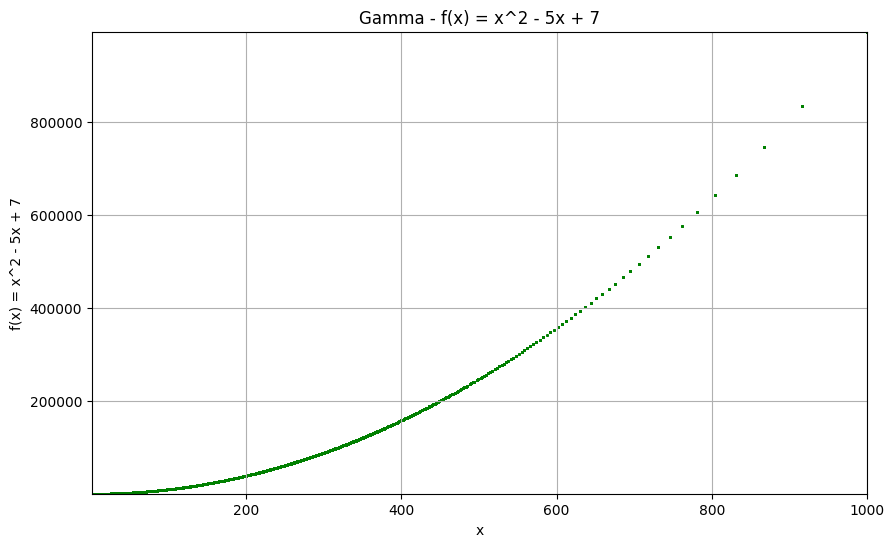

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Define la función f(x)
def f(x):
    return x**2 - 5*x + 7

# Función para calcular métricas estadísticas
def calcular_metricas(muestras):
    media = np.mean(muestras)
    mediana = np.median(muestras)
    varianza = np.var(muestras)
    desviacion_std = np.std(muestras)
    coef_variacion = desviacion_std / media
    rango = np.ptp(muestras)
    minimo = np.min(muestras)
    maximo = np.max(muestras)
    sesgo = skew(muestras)
    curtosis = kurtosis(muestras)

    metricas = {
        "Media": media,
        "Mediana": mediana,
        "Varianza": varianza,
        "Desviación Estándar": desviacion_std,
        "Coeficiente de Variación": coef_variacion,
        "Rango": rango,
        "Mínimo": minimo,
        "Máximo": maximo,
        "Sesgo": sesgo,
        "Curtosis": curtosis
    }

    return metricas

# Inicializa listas para almacenar los valores de x y f(x)
x_vals = []
y_vals = []

# Abre el archivo y lee línea por línea
with open('numeros_gamma.txt', 'r') as file:
    for line in file:
        # Asegúrate de que cada línea contiene un valor numérico válido.
        try:
            x = float(line.strip())  # Cambiado a float para mayor precisión.
            x_vals.append(x)
            y_vals.append(f(x))
        except ValueError:
            # Si no es un número, imprime un error y continúa con la siguiente línea.
            print(f"La línea no es un número válido: {line.strip()}")

# Verifica que se hayan leído datos antes de continuar.
if not x_vals:
    raise ValueError("No se encontraron datos numéricos en el archivo.")

# Calcula las métricas para los valores de f(x)
metricas = calcular_metricas(y_vals)

# Imprime las métricas calculadas
for nombre, valor in metricas.items():
    print(f'{nombre}: {valor}')

# Grafica los puntos
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura para mejor visualización.
plt.scatter(x_vals, y_vals, color='green', s=1)  # Aumenta el tamaño del punto para mejor visualización.

plt.xlabel('x')
plt.ylabel('f(x) = x^2 - 5x + 7')
plt.title('Gamma - f(x) = x^2 - 5x + 7')
plt.grid(True)

# Establece una escala lineal en caso de que matplotlib haya seleccionado una logarítmica automáticamente.
plt.yscale('linear')

# Ajusta los límites de los ejes si es necesario, basado en los valores de x y f(x).
plt.xlim(min(x_vals), max(x_vals))
plt.ylim(min(y_vals), max(y_vals))

plt.show()

Caminante aleatorio

Número de pasos: 5000
Número de caminantes: 1


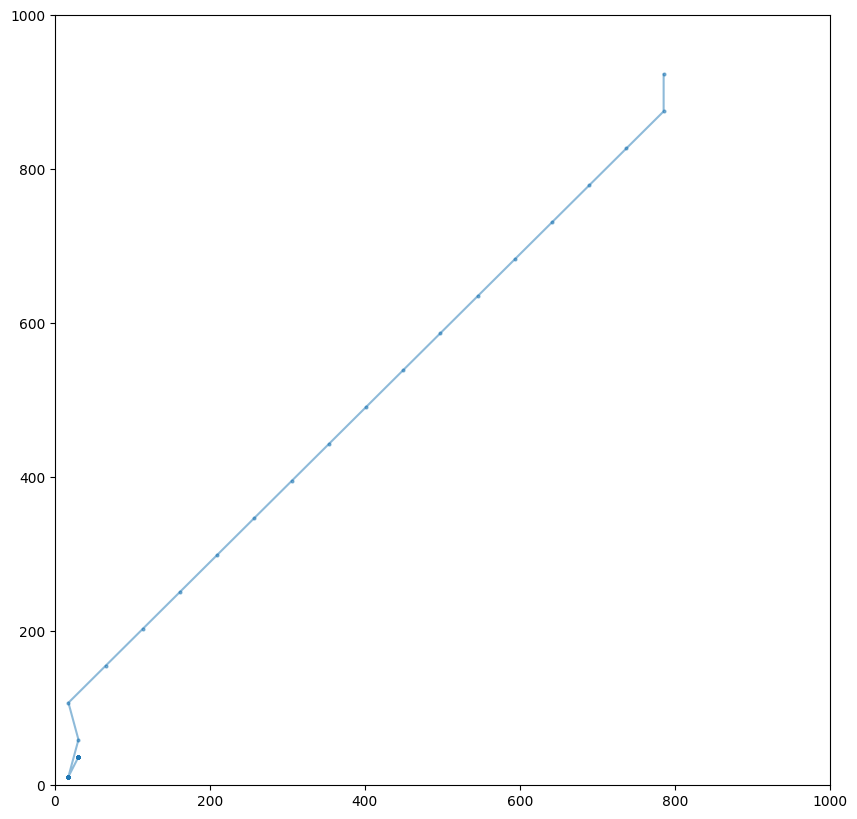

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
import random

# Parámetros de la simulación
ancho, alto = 1000, 1000
distancias_posibles = [12, 24, 36, 48]
restitucion = 1.0
direcciones = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]

# Solicita al usuario el número de pasos y la cantidad de caminantes
num_pasos = int(input("Número de pasos: "))
num_caminantes = int(input("Número de caminantes: "))

# Leer números desde un archivo
with open("/content/feigenbaum_estandar_x_multiplied.txt", "r") as archivo:
    numeros_aleatorios = [float(linea.strip()) for linea in archivo.readlines()]

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0, ancho)
ax.set_ylim(0, alto)

# Inicialización de los caminantes
caminantes = [{
    "plot": ax.plot([], [], '-o', markersize=2, alpha=0.5)[0],
    "x": [],
    "y": [],
    "indice_numeros": 0
} for i in range(num_caminantes)]

def init():
    for i, caminante in enumerate(caminantes):
        if not caminante["x"] and not caminante["y"]:  # Comprueba si las listas están vacías
            pos_x = random.choice(numeros_aleatorios) % ancho
            pos_y = random.choice(numeros_aleatorios) % alto
            caminante["x"].append(pos_x)
            caminante["y"].append(pos_y)
            caminante["colisiones"] = 0  # Añadir contador de colisiones aquí
            caminante["plot"].set_data(caminante["x"], caminante["y"])
            #print(f'Init - Caminante {i}: pos_x={pos_x}, pos_y={pos_y}')  # Imprime las posiciones iniciales
    return [c["plot"] for c in caminantes]

# Esta función se llama en cada cuadro para comprobar si hay colisiones
def check_collisions():
    for i in range(len(caminantes)):
        for j in range(i + 1, len(caminantes)):
            dx = caminantes[i]["x"][-1] - caminantes[j]["x"][-1]
            dy = caminantes[i]["y"][-1] - caminantes[j]["y"][-1]
            distance = np.hypot(dx, dy)
            # Usamos un umbral de distancia más realista para la detección de colisiones
            if distance < 20:  # Asumimos que cada caminante tiene un radio de 20 unidades
                # Actualizar el contador de colisiones para cada caminante
                caminantes[i]["colisiones"] += 1
                caminantes[j]["colisiones"] += 1

                # Intercambiamos las direcciones para simular una reacción de colisión
                caminantes[i]["x"][-1], caminantes[j]["x"][-1] = caminantes[j]["x"][-1], caminantes[i]["x"][-1]
                caminantes[i]["y"][-1], caminantes[j]["y"][-1] = caminantes[j]["y"][-1], caminantes[i]["y"][-1]

# Agrega estos diccionarios después de definir las direcciones y distancias posibles
conteo_direcciones = {(0, 1): 0, (1, 1): 0, (1, 0): 0, (1, -1): 0, (0, -1): 0, (-1, -1): 0, (-1, 0): 0, (-1, 1): 0}
conteo_distancias = {12: 0, 24: 0, 36: 0, 48: 0}
conteo_cuadrantes = {'cuadrante_1': 0, 'cuadrante_2': 0, 'cuadrante_3': 0, 'cuadrante_4': 0}
conteo_colisiones_paredes = {'izquierda': 0, 'derecha': 0, 'arriba': 0, 'abajo': 0}


# Modifica la función update para incluir el conteo
def update(frame):
    # Primero, revisa las colisiones en el estado actual de los caminantes
    check_collisions()

    for caminante in caminantes:
        indice = caminante["indice_numeros"]
        x, y = caminante["x"][-1], caminante["y"][-1]
        #print(f'    Antes del movimiento - Caminante: x={x}, y={y}')

        num_dist = numeros_aleatorios[indice % len(numeros_aleatorios)]
        num_dir = numeros_aleatorios[(indice + 1) % len(numeros_aleatorios)]
        caminante["indice_numeros"] += 2

        direccion_idx = int(round((num_dir - 1) / 125))
        distancia_idx = int(round((num_dist - 1) / 250))
        # Asegurarnos de que los índices no excedan los límites de las listas
        direccion_idx = min(direccion_idx, len(direcciones) - 1)
        distancia_idx = min(distancia_idx, len(distancias_posibles) - 1)

        # Para identificar la distancia seleccionada
        distancia = distancias_posibles[distancia_idx]

        dir_x, dir_y = direcciones[direccion_idx]
        x_nuevo = x + dir_x * distancia
        y_nuevo = y + dir_y * distancia

        # Actualiza los contadores de direcciones y distancias
        conteo_direcciones[(dir_x, dir_y)] += 1
        conteo_distancias[distancia] += 1

        # Ajuste para rebote en frontera horizontal
        if x_nuevo < 0:
            x_nuevo = -x_nuevo * restitucion
            conteo_colisiones_paredes['izquierda'] += 1
        elif x_nuevo > ancho:
            x_nuevo = ancho - (x_nuevo - ancho) * restitucion
            conteo_colisiones_paredes['derecha'] += 1

        # Ajuste para rebote en frontera vertical
        if y_nuevo < 0:
            y_nuevo = -y_nuevo * restitucion
            conteo_colisiones_paredes['abajo'] += 1
        elif y_nuevo > alto:
            y_nuevo = alto - (y_nuevo - alto) * restitucion
            conteo_colisiones_paredes['arriba'] += 1

        # Actualizar la posición del caminante
        caminante["x"].append(x_nuevo)
        caminante["y"].append(y_nuevo)
        caminante["plot"].set_data(caminante["x"], caminante["y"])
        #print(f'    Después del movimiento - Caminante: x_nuevo={x_nuevo}, y_nuevo={y_nuevo}')  # Imprime la nueva posición

        # Determinar en qué cuadrante cae la nueva posición y actualizar el contador
        if x_nuevo > 500 and y_nuevo > 500:
            conteo_cuadrantes['cuadrante_1'] += 1
        elif x_nuevo <= 500 and y_nuevo > 500:
            conteo_cuadrantes['cuadrante_2'] += 1
        elif x_nuevo <= 500 and y_nuevo <= 500:
            conteo_cuadrantes['cuadrante_3'] += 1
        elif x_nuevo > 500 and y_nuevo <= 500:
            conteo_cuadrantes['cuadrante_4'] += 1

    return [c["plot"] for c in caminantes]

ani = FuncAnimation(fig, update, frames=num_pasos, init_func=init, blit=True, repeat=False)

HTML(ani.to_html5_video())

**Prueba (1 txt)**

¿Desde que línea del .txt desea comenzar a leer? 1
Número de pasos: 10000
Número de caminantes: 3
¿Deseas ver la animación? (y/n): n
[898.8264579772949, 423.95555806159973, 924.7098896503448, 390.0876702070236, 894.4504024982452, 472.9080739021301, 947.7862474918365, 297.478155374527, 768.2098958492279, 834.7050712108612, 639.6440081596375, 931.5499649047852, 371.4734605550766, 877.2457180023193, 558.9066028594971, 952.475447177887, 286.5567651987076, 763.8761656284332, 808.1163439750671, 701.0207116603851, 870.8457627296448, 534.319703578949, 974.5783240795135, 252.62573432922363, 717.0388467311859, 921.6733815670013, 478.3024123907089, 943.5695858001709, 335.1699265241623, 825.1776242256165, 687.6673748493195, 855.6229662895203, 567.4290914535522, 951.3021910190582, 293.50503635406494, 782.5239219665527, 779.253653049469, 747.595112323761, 808.8620836734772, 671.6105513572693, 901.1899631023407, 455.02317547798157, 959.3630521297455, 307.900452375412, 805.4082798957825, 711.353341817

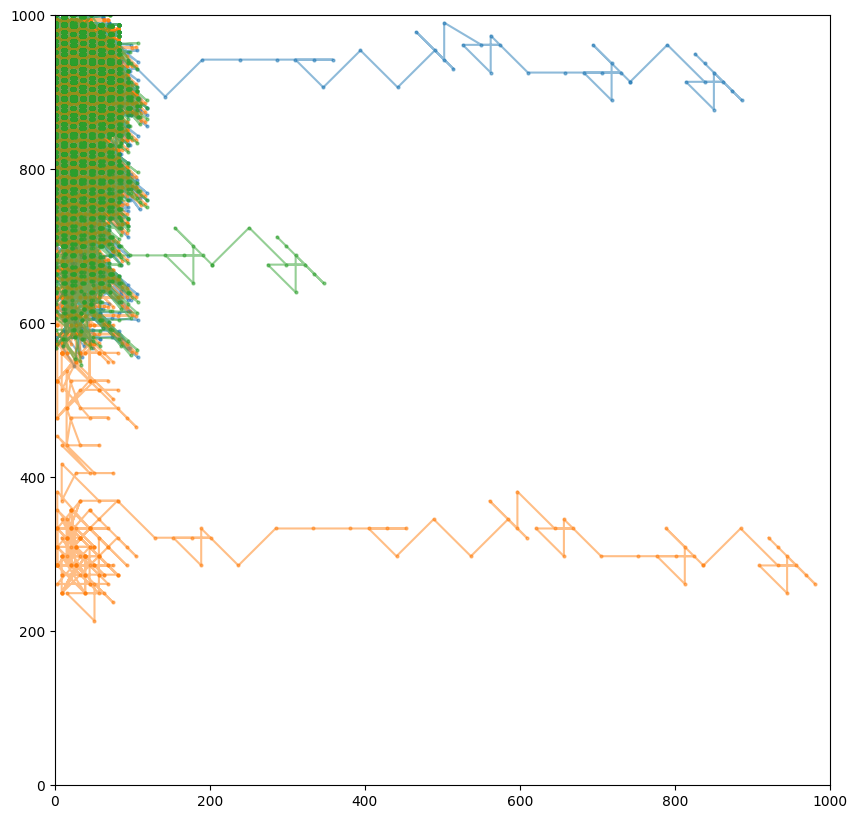

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
import random

# Parámetros de la simulación
ancho, alto = 1000, 1000
distancias_posibles = [12, 24, 36, 48]
restitucion = 1.0
direcciones = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]

# Solicita al usuario el número de pasos, cantidad de caminantes y opción de animación
linea_inicio = int(input("¿Desde que línea del .txt desea comenzar a leer? "))
num_pasos = int(input("Número de pasos: "))
num_caminantes = int(input("Número de caminantes: "))
mostrar_animacion = input("¿Deseas ver la animación? (y/n): ").strip().lower()

# Leer números desde un archivo a partir de una línea específica
with open("/content/predicciones_feingenbaum_multiplied.txt", "r") as archivo:
    numeros_aleatorios = [float(linea.strip()) for i, linea in enumerate(archivo) if i >= (linea_inicio - 1)]

print(numeros_aleatorios)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0, ancho)
ax.set_ylim(0, alto)

# Inicialización de los caminantes
caminantes = [{
    "plot": ax.plot([], [], '-o', markersize=2, alpha=0.5)[0] if mostrar_animacion == 'y' else None,
    "x": [],
    "y": [],
    "indice_numeros": 0
} for i in range(num_caminantes)]

def init():
    for caminante in caminantes:
        if not caminante["x"] and not caminante["y"]:  # Comprueba si las listas están vacías
            pos_x = random.choice(numeros_aleatorios) % ancho
            pos_y = random.choice(numeros_aleatorios) % alto
            caminante["x"].append(pos_x)
            caminante["y"].append(pos_y)
            caminante["colisiones"] = 0  # Añadir contador de colisiones aquí
            if mostrar_animacion == 'y':
                caminante["plot"].set_data(caminante["x"], caminante["y"])
    if mostrar_animacion == 'y':
        return [c["plot"] for c in caminantes]
    else:
        return []

# Esta función se llama en cada cuadro para comprobar si hay colisiones
def check_collisions():
    for i in range(len(caminantes)):
        for j in range(i + 1, len(caminantes)):
            dx = caminantes[i]["x"][-1] - caminantes[j]["x"][-1]
            dy = caminantes[i]["y"][-1] - caminantes[j]["y"][-1]
            distance = np.hypot(dx, dy)
            if distance < 20:
                caminantes[i]["colisiones"] += 1
                caminantes[j]["colisiones"] += 1
                caminantes[i]["x"][-1], caminantes[j]["x"][-1] = caminantes[j]["x"][-1], caminantes[i]["x"][-1]
                caminantes[i]["y"][-1], caminantes[j]["y"][-1] = caminantes[j]["y"][-1], caminantes[i]["y"][-1]

conteo_direcciones = {(0, 1): 0, (1, 1): 0, (1, 0): 0, (1, -1): 0, (0, -1): 0, (-1, -1): 0, (-1, 0): 0, (-1, 1): 0}
conteo_distancias = {12: 0, 24: 0, 36: 0, 48: 0}
conteo_cuadrantes = {'cuadrante_1': 0, 'cuadrante_2': 0, 'cuadrante_3': 0, 'cuadrante_4': 0}
conteo_colisiones_paredes = {'izquierda': 0, 'derecha': 0, 'arriba': 0, 'abajo': 0}

def update(frame):
    check_collisions()
    for caminante in caminantes:
        indice = caminante["indice_numeros"]
        x, y = caminante["x"][-1], caminante["y"][-1]
        num_dist = numeros_aleatorios[indice % len(numeros_aleatorios)]
        num_dir = numeros_aleatorios[(indice + 1) % len(numeros_aleatorios)]
        caminante["indice_numeros"] += 1

        direccion_idx = int(round((num_dir - 1) / 125))
        distancia_idx = int(round((num_dist - 1) / 250))
        direccion_idx = min(direccion_idx, len(direcciones) - 1)
        distancia_idx = min(distancia_idx, len(distancias_posibles) - 1)

        distancia = distancias_posibles[distancia_idx]
        dir_x, dir_y = direcciones[direccion_idx]
        x_nuevo = x + dir_x * distancia
        y_nuevo = y + dir_y * distancia

        conteo_direcciones[(dir_x, dir_y)] += 1
        conteo_distancias[distancia] += 1

        # Manejo de colisiones con las paredes
        if x_nuevo < 0:
            x_nuevo = -x_nuevo * restitucion
            conteo_colisiones_paredes['izquierda'] += 1
        elif x_nuevo > ancho:
            x_nuevo = ancho - (x_nuevo - ancho) * restitucion
            conteo_colisiones_paredes['derecha'] += 1

        if y_nuevo < 0:
            y_nuevo = -y_nuevo * restitucion
            conteo_colisiones_paredes['abajo'] += 1
        elif y_nuevo > alto:
            y_nuevo = alto - (y_nuevo - alto) * restitucion
            conteo_colisiones_paredes['arriba'] += 1

        x_nuevo = max(0, min(x_nuevo, ancho))
        y_nuevo = max(0, min(y_nuevo, alto))

        caminante["x"].append(x_nuevo)
        caminante["y"].append(y_nuevo)
        if mostrar_animacion == 'y':
            caminante["plot"].set_data(caminante["x"], caminante["y"])

        # Conteo de cuadrantes
        if x_nuevo > 500 and y_nuevo > 500:
            conteo_cuadrantes['cuadrante_1'] += 1
        elif x_nuevo <= 500 and y_nuevo > 500:
            conteo_cuadrantes['cuadrante_2'] += 1
        elif x_nuevo <= 500 and y_nuevo <= 500:
            conteo_cuadrantes['cuadrante_3'] += 1
        elif x_nuevo > 500 and y_nuevo <= 500:
            conteo_cuadrantes['cuadrante_4'] += 1

    if mostrar_animacion == 'y':
        return [c["plot"] for c in caminantes]
    else:
        return []

# Inicialización de las posiciones antes de la simulación
init()

if mostrar_animacion == 'y':
    ani = FuncAnimation(fig, update, frames=num_pasos, init_func=init, blit=True, repeat=False)
    display(HTML(ani.to_html5_video()))
else:
    for frame in range(num_pasos):
        update(frame)
    for caminante in caminantes:
        ax.plot(caminante["x"], caminante["y"], '-o', markersize=2, alpha=0.5)
    plt.show()

In [ ]:
print("Conteo de direcciones:")
for direccion, conteo in conteo_direcciones.items():
    print(f"Dirección {direccion}: {conteo}")

print("\nConteo de distancias (px):")
for distancia, conteo in conteo_distancias.items():
    print(f"Distancia {distancia}: {conteo}")

print("\nConteo de posiciones (cuadrantes):")
for cuadrante, conteo in conteo_cuadrantes.items():
    print(f"{cuadrante.title()}: {conteo}")

print("\nConteo de colisiones con paredes:")
for pared, conteo in conteo_colisiones_paredes.items():
    print(f"{pared}: {conteo}")

Conteo de direcciones:
Dirección (0, 1): 0
Dirección (1, 1): 0
Dirección (1, 0): 2271
Dirección (1, -1): 2694
Dirección (0, -1): 9795
Dirección (-1, -1): 10674
Dirección (-1, 0): 4074
Dirección (-1, 1): 492

Conteo de distancias (px):
Distancia 12: 0
Distancia 24: 3516
Distancia 36: 18105
Distancia 48: 8379

Conteo de posiciones (cuadrantes):
Cuadrante_1: 764
Cuadrante_2: 576
Cuadrante_3: 17854
Cuadrante_4: 10806

Conteo de colisiones con paredes:
izquierda: 14917
derecha: 4652
arriba: 228
abajo: 22775


In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis

# Función para calcular métricas estadísticas
def calcular_metricas(muestras):
    media = np.mean(muestras)
    mediana = np.median(muestras)
    varianza = np.var(muestras)
    desviacion_std = np.std(muestras)
    coef_variacion = desviacion_std / media if media != 0 else float('inf')
    rango = np.ptp(muestras)
    minimo = np.min(muestras)
    maximo = np.max(muestras)
    sesgo = skew(muestras)
    curtosis = kurtosis(muestras)

    metricas = {
        "Media": media,
        "Mediana": mediana,
        "Varianza": varianza,
        "Desviación Estándar": desviacion_std,
        "Coeficiente de Variación": coef_variacion,
        "Rango": rango,
        "Mínimo": minimo,
        "Máximo": maximo,
        "Sesgo": sesgo,
        "Curtosis": curtosis
    }

    return metricas

# Con los datos:
conteo_direcciones_valores = list(conteo_direcciones.values())
conteo_distancias_valores = list(conteo_distancias.values())
conteo_cuadrantes_valores = list(conteo_cuadrantes.values())
conteo_colisiones_paredes_valores = list(conteo_colisiones_paredes.values())

# Cálculo de métricas para cada uno de los conjuntos de datos
metricas_direcciones = calcular_metricas(conteo_direcciones_valores)
metricas_distancias = calcular_metricas(conteo_distancias_valores)
metricas_cuadrantes = calcular_metricas(conteo_cuadrantes_valores)
metricas_colisiones_paredes = calcular_metricas(conteo_colisiones_paredes_valores)

# Imprimir resultados
print("Métricas para conteo de direcciones:", metricas_direcciones)
print("Métricas para conteo de distancias:", metricas_distancias)
print("Métricas para conteo de cuadrantes:", metricas_cuadrantes)
print("Métricas para conteo de colisiones con paredes:", metricas_colisiones_paredes)

Métricas para conteo de direcciones: {'Media': 3750.0, 'Mediana': 2482.5, 'Varianza': 15828864.75, 'Desviación Estándar': 3978.55058406953, 'Coeficiente de Variación': 1.0609468224185414, 'Rango': 10674, 'Mínimo': 0, 'Máximo': 10674, 'Sesgo': 0.8106580224664515, 'Curtosis': -0.9306023180912799}
Métricas para conteo de distancias: {'Media': 7500.0, 'Mediana': 5947.5, 'Varianza': 46340230.5, 'Desviación Estándar': 6807.365900258337, 'Coeficiente de Variación': 0.9076487867011116, 'Rango': 18105, 'Mínimo': 0, 'Máximo': 18105, 'Sesgo': 0.5613094515434968, 'Curtosis': -1.1297071036626773}
Métricas para conteo de cuadrantes: {'Media': 7500.0, 'Mediana': 5785.0, 'Varianza': 52862606.0, 'Desviación Estándar': 7270.667507182542, 'Coeficiente de Variación': 0.9694223342910057, 'Rango': 17278, 'Mínimo': 576, 'Máximo': 17854, 'Sesgo': 0.33078955802491433, 'Curtosis': -1.5713115571655223}
Métricas para conteo de colisiones con paredes: {'Media': 10643.0, 'Mediana': 9784.5, 'Varianza': 77454201.5, '